In [12]:
import obspy, glob
import numpy as np
from obspy import Trace, UTCDateTime
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
# import h5py
import matplotlib.dates as mdates
from matplotlib import cm
from datetime import datetime, date, timedelta
from scipy import signal
import numpy.matlib
from scipy.signal import find_peaks

In [2]:
def calib(data, S):
    return data / ((10)**(S/20)) * (10**(-6))

In [3]:
!ls ../Results/sound/Taoyuan_fish_chorus_0619194340_downsampling.wav

../Results/sound/Taoyuan_fish_chorus_0619194340_downsampling.wav


In [4]:
path = '../Results/sound'
file = f'{path}/Taoyuan_fish_chorus_0619194340_downsampling.wav'

# path = '/Volumes/Data/Soundscape/02_KeeLung/2023/20230609-20230625/wav'
# file = f'{path}/7080.230614070001.wav'

S = -176.1 # end to end 619194340_downsampling_lp.wav

In [5]:
from scipy.io.wavfile import read, write
rate, data = read(file)
data = data.astype(np.float32, order='C') / 32768.0
data = calib(data, S)

strtime = file.rsplit('.')[1]
mm = strtime[2:4]
dd = strtime[4:6]
hh = strtime[6:8]
print(mm,dd,hh)

tr = Trace()
tr.data = data
tr.stats.sampling_rate = rate
# tr = tr.slice(tr.stats.starttime, tr.stats.starttime)
# tr = tr.filter('bandpass', freqmin=100, freqmax=1000, corners=4, zerophase=True)


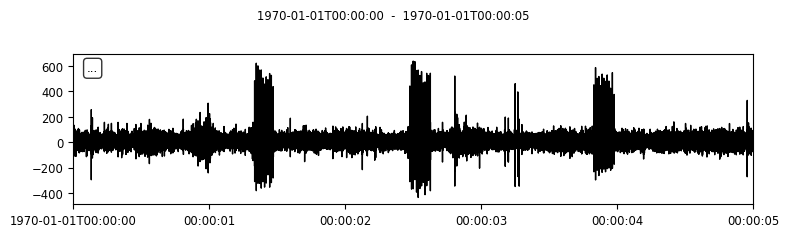

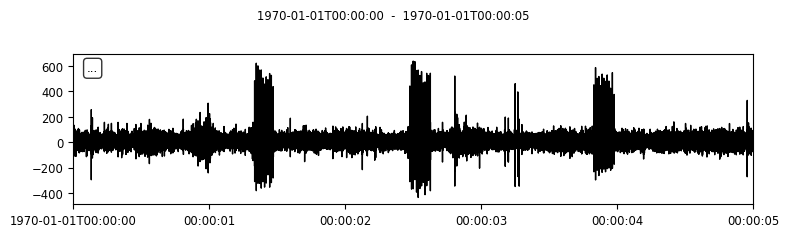

In [6]:
tr.plot()

In [7]:


# rate, data = read(file)
# # audio_data = data.astype(np.float32, order='C') / 32768.0
# # calib_data = audio_data / ((10)**(S/20))
# data = calib(data, S)


/var/folders/07/_m900g1931d1pc5dgv3v4qpw0000gn/T/ipykernel_11243/1368846354.py:4: RuntimeWarning: divide by zero encountered in log10
  data = 10*np.log10(np.abs(P)/np.power(1, 2)) #+ 176.2


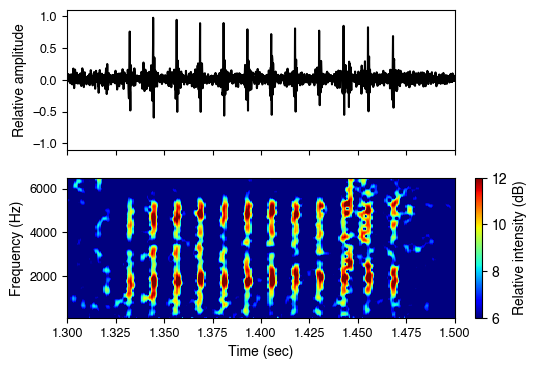

In [22]:
length = 256/2
f,t,P = signal.stft(tr.data, fs= tr.stats.sampling_rate, window='hann', 
                          nperseg=length, noverlap=int(0.9*length), nfft=8000, detrend='constant', boundary=None, padded=False)
data = 10*np.log10(np.abs(P)/np.power(1, 2)) #+ 176.2

axis=1
ambient = np.percentile(data, 20, axis=axis)
if axis==0:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1))
elif axis==1:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1).T)

#============= plot
#============= plot
#============= plot


# xmin = tr_cut.times()[0]; xmax = tr_cut.times()[-1]
# xmin = 1.25; xmax =1.55
xmin = 1.3; xmax=xmin+0.2
ylim = 1.1

fig, ax = plt.subplots(2,1, figsize=(5, 4), sharex=True)
plt.rcParams["font.family"] = "Helvetica"   
im1 = ax[1].imshow(input_data, vmin=6, vmax=12,
           origin='lower',  aspect='auto', cmap=cm.jet,
           extent=[t[0], t[-1], f[0], f[-1]], interpolation='none')
ax[1].set_ylabel('Frequency (Hz)', fontsize=10)
ax[1].set_xlabel('Time (sec)' , fontsize=10)
ax[1].set_ylim(100, 6500)
ax[1].set_xlim(xmin,xmax)
# ax[1].set_xticks(np.arange(xmin, xmax+0.01, 0.1))
# ax[1].set_xticklabels([0, 0.1,0.2,0.3,0.4,0.5,0.6])
ax[1].tick_params(axis='both', labelsize=9)
rect = [0.94, 0.11, 0.015, 0.35]
cbar_ax = fig.add_axes(rect)
plt.colorbar(im1, cax=cbar_ax, label = 'Relative intensity (dB)')

ax[0].plot(tr.times(), tr.data/ max(abs(tr.data)), 'k')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(-1*ylim, ylim)
ax[0].set_ylabel('Relative amplitude', fontsize=10)
# ax[0].set_title(f'Keelung_fish_chorus_20230619T221009\n')
ax[0].tick_params(axis='both', labelsize=9)

savepath = '/Users/tong/Documents/09_IONTU/ForCF/海保署報告/Figure'
# plt.savefig(f'{savepath}/Taoyuan_230822070001_399Hz.png', dpi=200, bbox_inches='tight')
# plt.savefig(f'{savepath}/Taoyuan_230822070001_399Hz.pdf', dpi=200)

Text(0.5, 0, 'Time (s)')

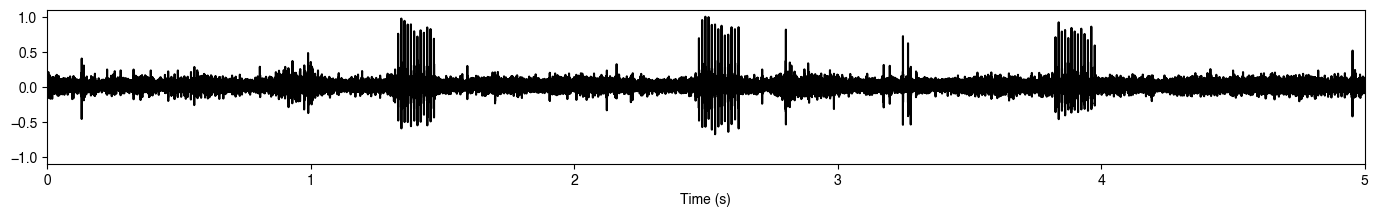

In [14]:
fig, ax = plt.subplots(1,1, figsize=(17, 2), sharex=True)
ax.plot(tr.times(), tr.data/ max(abs(tr.data)), 'k')
ax.set_xlim(tr.times()[0], tr.times()[-1])
ax.set_ylim(-1*ylim, ylim)
ax.set_xlabel('Time (s)')

In [18]:
tr_ = tr.slice(tr.stats.starttime+1.3, tr.stats.starttime+1.5)


12.083333333333334


/var/folders/07/_m900g1931d1pc5dgv3v4qpw0000gn/T/ipykernel_11243/1004587738.py:15: RuntimeWarning: divide by zero encountered in log10
  data = 10*np.log10(np.abs(P)/np.power(1, 2)) #+ 176.2


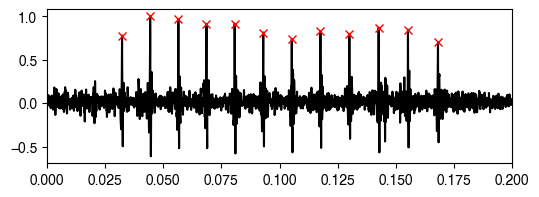

In [19]:
fig, ax = plt.subplots(1,1, figsize=(6, 2), sharex=True)
ax.plot(tr_.times(), tr_.data/max(tr_.data), 'k')
ax.set_xlim(tr_.times()[0], tr_.times()[-1])

x = tr_.data/max(tr_.data)

peaks, _ = find_peaks(x, distance=200, height=0.5)
print((peaks[1]-peaks[0])/tr_.stats.sampling_rate*1000)
plt.plot(tr_.times()[peaks], x[peaks], "x", color='r')


length = 256/2
f,t,P = signal.stft(tr.data, fs= tr.stats.sampling_rate, window='hann', 
                          nperseg=length, noverlap=int(0.9*length), nfft=8000, detrend='constant', boundary=None, padded=False)
data = 10*np.log10(np.abs(P)/np.power(1, 2)) #+ 176.2

axis=1
ambient = np.percentile(data, 20, axis=axis)
if axis==0:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1))
elif axis==1:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1).T)

(15000.0, 20000.0)

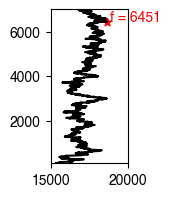

In [21]:
fmin = 100
fmax = 7000
i_fmin = np.where((f>=fmin) & (f<=fmax))[0][0]
i_fmax = np.where((f>=fmin) & (f<=fmax))[0][-1]
fig, ax = plt.subplots(1,1, figsize=(1, 2), sharex=True)
time_sum = np.sum(input_data[i_fmin:i_fmax, :], axis=1)
plt.plot(time_sum, f[i_fmin:i_fmax],'k')

energy_max = np.argmax(time_sum)

plt.scatter(x=np.max(time_sum),y=f[i_fmin:i_fmax][energy_max], marker='*', color='r')
plt.text(x=np.max(time_sum)+200,y=f[i_fmin:i_fmax][energy_max], 
         s = f'f = {int(f[i_fmin:i_fmax][energy_max])}', 
         ha='left', color ='r' )
plt.ylim(fmin,fmax)
plt.xlim(15000, 20000)


In [ ]:
time_sum=np.sum(input_data[i_fmin:i_fmax, :], axis=1)


In [ ]:
max(time_sum)

In [ ]:
time_sum[time_sum==]

In [ ]:
np.argmax(time_sum)

In [ ]:
f[i_fmin:i_fmax][1208]

In [ ]:
f[2646]